<img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="360">

# COVID-19 Impact in India - Jyoti Sankar Sahoo

<img src="https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg" align='center'><br/>

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Importing the Datasets](#section301)<br>
  - 3.2 [Description of the Datasets](#section301)<br>
  - 3.3 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
  - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [**Analysis based on Total Cases**](#section501)<br>
    - 5.1.1 [Total Cases in India and Current Status till 28th Apr 2020](#section50101)<br>
    - 5.1.2 [Total Cases in Different States and UT of India](#section50102)<br>
    - 5.1.3 [Top 10 Most Affected City of India Based on Total Cases Till 28th Apr 2020](#section50103)<br>
    - 5.1.4 [Total Cases Trend](#section50104)<br>
  - 5.2 [**Analysis based on Age Groups**](#section502)<br>
  - 5.3 [**Analysis based on Gender**](#section503)<br>
  - 5.4 [**Total Positive Case Distribution by States**](#section504)<br>
  - 5.5 [**Active Cases Distribution by States**](#section505)<br>  
  - 5.5 [**Recovered Case Distribution by States**](#section505)<br>  
  - 5.6 [**Deceased Case Distribution by States**](#section506)<br>
    
6. [Conclusion](#section6)
  - 6.1 [Actionable Insights](#section601)

<a id=section1></a>
## 1. Problem Statement

The biggest pandemic of 21st Century is no doubt the **Novel Coronavirus** or **COVID-19** which originated in the city of **Wuhan**, the capital of China's Hubai province and has since spreading globally. Without any vaccine available the whole world is fighting against this pandemic situation. In India the cases are increasing rapidly on daily basis and here we are going to analyse the **COVID-19** data for India to find out the insights out of it.

---

<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [3]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

     |████████████████████████████████| 7.2MB 27kB/s  eta 0:00:01     |███████████▉                    | 2.6MB 2.3MB/s eta 0:00:02     |██████████████████████████████▏ | 6.7MB 4.0MB/s eta 0:00:01
  Found existing installation: plotly 4.2.1
    Uninstalling plotly-4.2.1:
      Successfully uninstalled plotly-4.2.1
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
# Install chart_studio, please use this command. 

!pip install chart-studio

     |████████████████████████████████| 71kB 711kB/s eta 0:00:011
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

---

<a id=section3></a>
## 3. Loading Data

In this **Data Visualization** sheet we are using one dataset about **COVID-19 Impact in India**. 

- **raw_data** dataset: This dataset contains detail information about the **Positive cases** present in India and statewise distribution.


<a id=section301></a>
### 3.1 Importing the Dataset

In [85]:
# Importing the dataset.

df_raw = pd.read_csv('raw_data.csv')
df_raw.head()

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes
0,1,KL-TS-P1,30/01/2020,NaN,20.0,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/1222819465143832577,https://weather.com/en-IN/india/news/news/2020-02-14-kerala-defeats-coronavirus-indias-three-covid-19-patients-successfully,NaN,Student from Wuhan
1,2,KL-AL-P1,2/2/2020,NaN,71.0,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-reports-second-case-of-coronavirus-1642494-2020-02-02,https://weather.com/en-IN/india/news/news/2020-02-14-kerala-defeats-coronavirus-indias-three-covid-19-patients-successfully,NaN,Student from Wuhan
2,3,KL-KS-P1,3/2/2020,NaN,17.0,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-now-confirms-third-case-of-coronavirus-1642789-2020-02-03,https://twitter.com/ANI/status/1224221485805395968?s=20,https://weather.com/en-IN/india/news/news/2020-02-14-kerala-defeats-coronavirus-indias-three-covid-19-patients-successfully,Student from Wuhan
3,4,DL-P1,2/3/2020,NaN,45.0,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-jail-delhi-s-1st-covid-19-patient-recalls-time-in-isolation-ward-has-this-one-tip-for-others-1656088-2020-03-16,https://economictimes.indiatimes.com/news/politics-and-nation/coronavirus-cases-in-india-live-news-latest-updates-mar2/liveblog/74432375.cms,NaN,Travel history to Italy and Austria
4,5,TS-P1,2/3/2020,NaN,24.0,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,"Travelled from Dubai to Bangalore on 20th Feb, stayed there for 2 days and took a bus to Hyderabad",NaN,India,Imported,2/3/2020,https://www.deccanherald.com/national/south/quarantine-not-a-jail-no-stigma-attached-telanganas-first-coronavirus-case-and-survivor-819012.html,https://www.indiatoday.in/india/story/coronavirus-in-india-tracking-country-s-first-50-covid-19-cases-what-numbers-tell-1654468-2020-03-12,https://www.thehindu.com/news/national/coronavirus-live-updates-march-14-2020/article31066969.ece,"Travel history to Dubai, Singapore contact"


<a id=section302></a>
### 3.2 Description of the Dataset

- This dataset provides a complete details of patients who are diagnosed with this Corona virus attack. This includes the informations like patient state and city along with date of announcement and the corresponding travel history of the patient. The travel histry of patient is very important to stop the spreading by using necessary precaution in that travelled area. To reduce the spreading our Prime Minister has announced lockdown in India till 3rd May which is a great initiative to control the rapid spreading of this virus.


In [86]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27891 entries, 0 to 27890
Data columns (total 20 columns):
Patient Number                               27891 non-null int64
State Patient Number                         2997 non-null object
Date Announced                               27891 non-null object
Estimated Onset Date                         0 non-null float64
Age Bracket                                  25268 non-null float64
Gender                                       5313 non-null object
Detected City                                2347 non-null object
Detected District                            20246 non-null object
Detected State                               27890 non-null object
State code                                   27890 non-null object
Current Status                               27891 non-null object
Notes                                        26555 non-null object
Contracted from which Patient (Suspected)    1563 non-null object
Nationality                

- ```info``` function gives us the following insights into the df_menu dataframe:

  - There are a total of **27891 samples (rows)** and **20 columns** in the dataframe.
  
  - There are **2 columns** with a **numeric** datatype and **18 columns** with an **object** datatype.
  
  - There are **missing** values in the data.

---

<a id=section303></a>
### 3.3 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __profiling_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [8]:
# To install pandas profiling please run this command.

!pip install pandas-profiling==1.4.3

  Created wheel for pandas-profiling: filename=pandas_profiling-1.4.3-py2.py3-none-any.whl size=35926 sha256=c54c5874c842c37e962e5fdf68fc25c32975ddf6d83aa85acf7e91fec3565ff6
  Stored in directory: /home/nbuser/.cache/pip/wheels/04/d2/cd/4e9162d61bc444e853cf738770ff1491a59137bf2c165a10e3
Successfully built pandas-profiling
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
import pandas_profiling

In [87]:
# Generating the Profile Report for df_raw.

pandas_profiling.ProfileReport(df_raw)

Number of variables,20
Number of observations,27891
Total Missing (%),48.1%
Total size in memory,4.3 MiB
Average record size in memory,160.0 B
Numeric,2
Categorical,17
Boolean,0
Date,0
Text (Unique),0
Rejected,1


---

<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.


- In order to avoid any errors, please run **Pandas Profiling** before running the code below.

In [88]:
df_raw.head()

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes
0,1,KL-TS-P1,30/01/2020,NaN,20.0,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/1222819465143832577,https://weather.com/en-IN/india/news/news/2020-02-14-kerala-defeats-coronavirus-indias-three-covid-19-patients-successfully,NaN,Student from Wuhan
1,2,KL-AL-P1,2/2/2020,NaN,71.0,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-reports-second-case-of-coronavirus-1642494-2020-02-02,https://weather.com/en-IN/india/news/news/2020-02-14-kerala-defeats-coronavirus-indias-three-covid-19-patients-successfully,NaN,Student from Wuhan
2,3,KL-KS-P1,3/2/2020,NaN,17.0,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-now-confirms-third-case-of-coronavirus-1642789-2020-02-03,https://twitter.com/ANI/status/1224221485805395968?s=20,https://weather.com/en-IN/india/news/news/2020-02-14-kerala-defeats-coronavirus-indias-three-covid-19-patients-successfully,Student from Wuhan
3,4,DL-P1,2/3/2020,NaN,45.0,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-jail-delhi-s-1st-covid-19-patient-recalls-time-in-isolation-ward-has-this-one-tip-for-others-1656088-2020-03-16,https://economictimes.indiatimes.com/news/politics-and-nation/coronavirus-cases-in-india-live-news-latest-updates-mar2/liveblog/74432375.cms,NaN,Travel history to Italy and Austria
4,5,TS-P1,2/3/2020,NaN,24.0,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,"Travelled from Dubai to Bangalore on 20th Feb, stayed there for 2 days and took a bus to Hyderabad",NaN,India,Imported,2/3/2020,https://www.deccanherald.com/national/south/quarantine-not-a-jail-no-stigma-attached-telanganas-first-coronavirus-case-and-survivor-819012.html,https://www.indiatoday.in/india/story/coronavirus-in-india-tracking-country-s-first-50-covid-19-cases-what-numbers-tell-1654468-2020-03-12,https://www.thehindu.com/news/national/coronavirus-live-updates-march-14-2020/article31066969.ece,"Travel history to Dubai, Singapore contact"


- We have to delete columns like **State Patient Number**, **Estimated Onset Date**, **State code**, **Source_1**, **Source_2** and **Source_3** as there are not provide the required information for our analysis.

In [89]:
df_raw.drop(['State Patient Number', 'Estimated Onset Date', 'State code', 'Source_1', 'Source_2', 'Source_3'], 1, inplace=True)
df_raw.drop('Contracted from which Patient (Suspected)',1, inplace=True)

In [90]:
df_raw.head()

,Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Notes,Nationality,Type of transmission,Status Change Date,Backup Notes
0,1,30/01/2020,20.0,F,Thrissur,Thrissur,Kerala,Recovered,Travelled from Wuhan,India,Imported,14/02/2020,Student from Wuhan
1,2,2/2/2020,71.0,NaN,Alappuzha,Alappuzha,Kerala,Recovered,Travelled from Wuhan,India,Imported,14/02/2020,Student from Wuhan
2,3,3/2/2020,17.0,NaN,Kasaragod,Kasaragod,Kerala,Recovered,Travelled from Wuhan,India,Imported,14/02/2020,Student from Wuhan
3,4,2/3/2020,45.0,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,"Travelled from Austria, Italy",India,Imported,15/03/2020,Travel history to Italy and Austria
4,5,2/3/2020,24.0,M,Hyderabad,Hyderabad,Telangana,Recovered,"Travelled from Dubai to Bangalore on 20th Feb, stayed there for 2 days and took a bus to Hyderabad",India,Imported,2/3/2020,"Travel history to Dubai, Singapore contact"


- Now we need to add a Age Group column which will be necessary to showcase which age group is most affected

In [91]:
# Replaceing the missing values of Age Bracket column with the mean of Age Bracket column.
df_raw['Age Bracket'].fillna(df_raw['Age Bracket'].mean())

0        20.000000
1        71.000000
2        17.000000
3        45.000000
4        24.000000
5        69.000000
6        55.000000
7        55.000000
8        55.000000
9        55.000000
10       55.000000
11       55.000000
12       55.000000
13       55.000000
14       55.000000
15       55.000000
16       55.000000
17       55.000000
18       55.000000
19       55.000000
20       70.000000
21       61.000000
22       10.000000
23       45.000000
24       61.000000
25       16.000000
26       40.000000
27       37.000000
28       27.000000
29       59.000000
           ...    
27861    46.080822
27862    46.080822
27863    46.080822
27864    46.080822
27865    46.080822
27866    46.080822
27867    46.080822
27868    46.080822
27869    46.080822
27870    46.080822
27871    46.080822
27872    46.080822
27873    46.080822
27874    46.080822
27875    46.080822
27876    46.080822
27877    46.080822
27878    46.080822
27879    46.080822
27880    46.080822
27881    46.080822
27882    46.

In [92]:
# Now we need to create Age Group. The missing values are replaced with mean and comes under 40-50 Age group category.
conditions = [
    (df_raw['Age Bracket'] <= 10),
    (df_raw['Age Bracket'] > 10) & (df_raw['Age Bracket'] <= 20),
    (df_raw['Age Bracket'] > 20) & (df_raw['Age Bracket'] <= 30),
    (df_raw['Age Bracket'] > 30) & (df_raw['Age Bracket'] <= 40),
    (df_raw['Age Bracket'] > 40) & (df_raw['Age Bracket'] <= 50),
    (df_raw['Age Bracket'] > 50) & (df_raw['Age Bracket'] <= 60),
    (df_raw['Age Bracket'] > 60) & (df_raw['Age Bracket'] <= 70),
    (df_raw['Age Bracket'] > 70) & (df_raw['Age Bracket'] <= 80),
    (df_raw['Age Bracket'] > 80) & (df_raw['Age Bracket'] <= 90),
    (df_raw['Age Bracket'] > 90) & (df_raw['Age Bracket'] <= 100)]
    #(df_raw['Age Bracket'] == 'NaN')]
choices = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df_raw['Age Bracket'] = np.select(conditions, choices, default='40-50')


In [94]:
df_raw.head()

,Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Notes,Nationality,Type of transmission,Status Change Date,Backup Notes
0,1,30/01/2020,10-20,F,Thrissur,Thrissur,Kerala,Recovered,Travelled from Wuhan,India,Imported,14/02/2020,Student from Wuhan
1,2,2/2/2020,70-80,NaN,Alappuzha,Alappuzha,Kerala,Recovered,Travelled from Wuhan,India,Imported,14/02/2020,Student from Wuhan
2,3,3/2/2020,10-20,NaN,Kasaragod,Kasaragod,Kerala,Recovered,Travelled from Wuhan,India,Imported,14/02/2020,Student from Wuhan
3,4,2/3/2020,40-50,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,"Travelled from Austria, Italy",India,Imported,15/03/2020,Travel history to Italy and Austria
4,5,2/3/2020,20-30,M,Hyderabad,Hyderabad,Telangana,Recovered,"Travelled from Dubai to Bangalore on 20th Feb, stayed there for 2 days and took a bus to Hyderabad",India,Imported,2/3/2020,"Travel history to Dubai, Singapore contact"


- **Gender** column has some **Missing Values** present. We have to replace those with proper tag.  

In [95]:
# To add Proper Gender Tag.
conditions = [
    (df_raw['Gender'] == 'F'),
    (df_raw['Gender'] == 'M'),
    (df_raw['Gender'] == 'NaN')]
choices = ['Female', 'Male', 'Not Specified']
df_raw['Gender'] = np.select(conditions, choices, default='Not Specified')


In [96]:
df_raw

,Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Notes,Nationality,Type of transmission,Status Change Date,Backup Notes
0,1,30/01/2020,10-20,Female,Thrissur,Thrissur,Kerala,Recovered,Travelled from Wuhan,India,Imported,14/02/2020,Student from Wuhan
1,2,2/2/2020,70-80,Not Specified,Alappuzha,Alappuzha,Kerala,Recovered,Travelled from Wuhan,India,Imported,14/02/2020,Student from Wuhan
2,3,3/2/2020,10-20,Not Specified,Kasaragod,Kasaragod,Kerala,Recovered,Travelled from Wuhan,India,Imported,14/02/2020,Student from Wuhan
3,4,2/3/2020,40-50,Male,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,"Travelled from Austria, Italy",India,Imported,15/03/2020,Travel history to Italy and Austria
4,5,2/3/2020,20-30,Male,Hyderabad,Hyderabad,Telangana,Recovered,"Travelled from Dubai to Bangalore on 20th Feb, stayed there for 2 days and took a bus to Hyderabad",India,Imported,2/3/2020,"Travel history to Dubai, Singapore contact"
5,6,3/3/2020,60-70,Male,Jaipur,Italians*,Rajasthan,Hospitalized,Travelled from Italy,Italy,Imported,3/3/2020,Italian tourist
6,7,4/3/2020,50-60,Not Specified,Gurugram,Italians*,Haryana,Recovered,Travelled from Italy,Italy,Imported,29/03/2020,Italian tourist
7,8,4/3/2020,50-60,Not Specified,Gurugram,Italians*,Haryana,Recovered,Travelled from Italy,Italy,Imported,29/03/2020,Italian tourist
8,9,4/3/2020,50-60,Not Specified,Gurugram,Italians*,Haryana,Recovered,Travelled from Italy,Italy,Imported,29/03/2020,Italian tourist
9,10,4/3/2020,50-60,Not Specified,Gurugram,Italians*,Haryana,Recovered,Travelled from Italy,Italy,Imported,29/03/2020,Italian tourist


- We still have some **Missing values** in the columns like **Detected City**, **Detected District**, **Nationality** which we can replace with string **Not Specified**

In [97]:
df_raw = df_raw.replace(np.nan, 'Not Specified', regex=True)

- **Notes** and **Status Change Date** columns are not required as we have **Backup Notes** which provide more precise value. So we can delete those

In [98]:
df_raw.drop(['Notes', 'Status Change Date'],1, inplace=True)


In [99]:
df_raw

,Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Nationality,Type of transmission,Backup Notes
0,1,30/01/2020,10-20,Female,Thrissur,Thrissur,Kerala,Recovered,India,Imported,Student from Wuhan
1,2,2/2/2020,70-80,Not Specified,Alappuzha,Alappuzha,Kerala,Recovered,India,Imported,Student from Wuhan
2,3,3/2/2020,10-20,Not Specified,Kasaragod,Kasaragod,Kerala,Recovered,India,Imported,Student from Wuhan
3,4,2/3/2020,40-50,Male,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,India,Imported,Travel history to Italy and Austria
4,5,2/3/2020,20-30,Male,Hyderabad,Hyderabad,Telangana,Recovered,India,Imported,"Travel history to Dubai, Singapore contact"
5,6,3/3/2020,60-70,Male,Jaipur,Italians*,Rajasthan,Hospitalized,Italy,Imported,Italian tourist
6,7,4/3/2020,50-60,Not Specified,Gurugram,Italians*,Haryana,Recovered,Italy,Imported,Italian tourist
7,8,4/3/2020,50-60,Not Specified,Gurugram,Italians*,Haryana,Recovered,Italy,Imported,Italian tourist
8,9,4/3/2020,50-60,Not Specified,Gurugram,Italians*,Haryana,Recovered,Italy,Imported,Italian tourist
9,10,4/3/2020,50-60,Not Specified,Gurugram,Italians*,Haryana,Recovered,Italy,Imported,Italian tourist


- Now we can see the data looks fine and all the possible pre-processing at this stage was done. We can proceed further with the next step.

---

<a id=section402></a>
### 4.2 Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __profiling_after_preprocessing.html__.

In [100]:
# Pandas Profiling after Data Preprocessing

pandas_profiling.ProfileReport(df_raw)

Number of variables,11
Number of observations,27891
Total Missing (%),0.0%
Total size in memory,2.3 MiB
Average record size in memory,88.0 B
Numeric,1
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


---

<a id=section5></a>
## 5. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.


- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**, such as:
 <br><br> 
  - A list of **outliers**.<br><br>
  
  - A **good-fitting model**.  <br><br>
  
  - **Estimates for parameters**.<br><br>
  
  - **Uncertainties** for those **estimates**.<br><br>
  
  - A **ranked list** of **important factors**.<br><br>
  
  - **Conclusions** as to whether **individual factors are statistically significant**.<br><br>
  
  - A **sense of robustness of conclusions**.<br><br>
  
  - **Optimal settings**.<br><br>

<a id=section501></a>
## 5.1 Analysis Based on Total Cases

<a id=section50101></a>
### 5.1.1 Total Cases in India and Current Status Till 28th Apr 2020

In [101]:
Total_Cases_in_India = df_raw['Patient Number'].count()
Total_Cases_in_India

27891

Text(0.5,1,'Recovery Status of COVID-19 Cases in India till 28th Apr 2020')

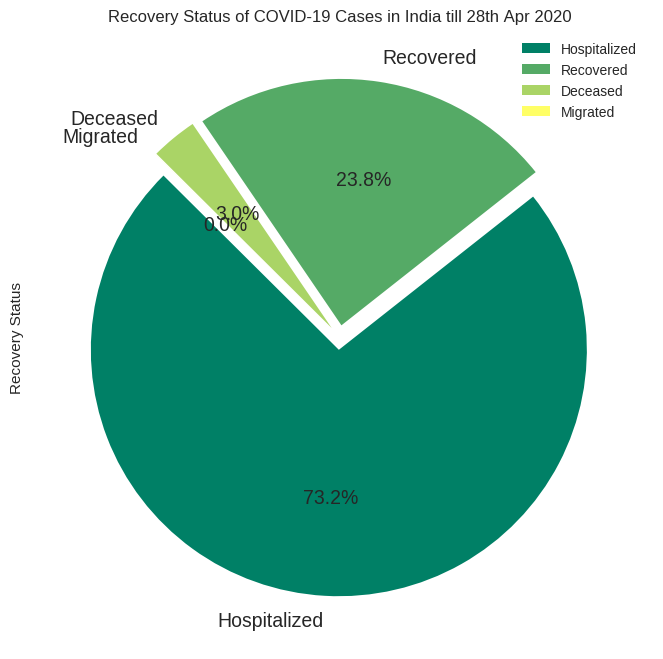

In [102]:
df_raw['Current Status'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(8,8), shadow=False, startangle=135, legend=True, cmap='summer')

plt.ylabel('Recovery Status')
plt.title('Recovery Status of COVID-19 Cases in India till 28th Apr 2020')

- As per the above analysis the majority of cases are still active. More than **73%** of the cases are still **Hospitalized**.

- The **recovery** is progressing in a good note and this only can possible because of our Doctors and Health workers. The current recovery rate is approx **24%** and hope this number will definitely increase in coming weeks.

- The **Deceased** rate is quite low which is again because of proper treatment by the Doctors and Health Workers. So Kudos to them.



<a id=section50102></a>
### 5.1.2 Total Cases in different States and UT of India

Text(0.5,1,'State wise Distribution of Total Cases In India')

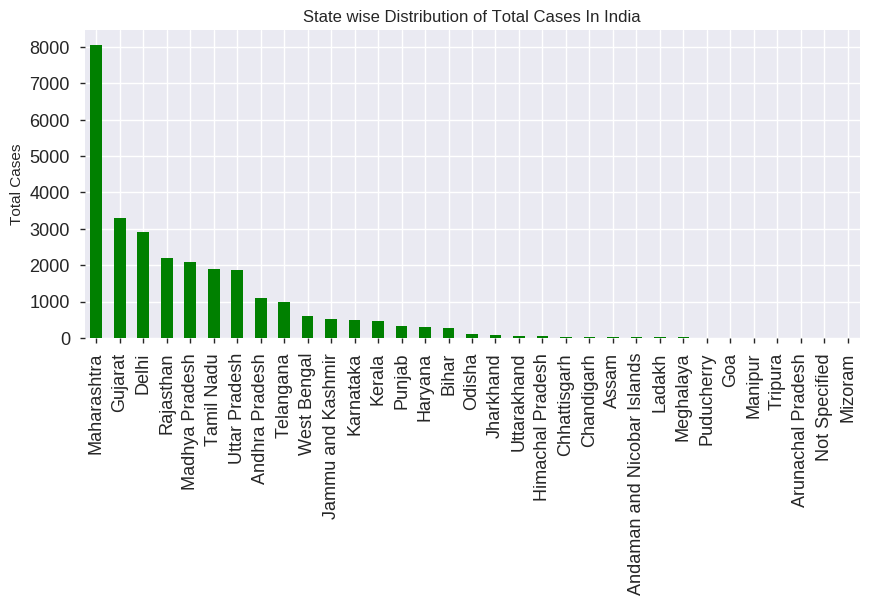

In [103]:
df_raw['Detected State'].value_counts().plot(kind='bar', figsize=(10,4), fontsize=13, color='green')

plt.ylabel('Total Cases')
plt.title('State wise Distribution of Total Cases In India')

- Clearly **Maharashtra ** is the most affected State of **India** due to highest number of positive cases.
- **Mizoram** state is the least affected state of **India**.


<a id=section50103></a>
### 5.1.3 Top 10 Most Affected City of India Based on Total Cases Till 28th Apr 2020

Text(0.5,1,'Most Affected City of India')

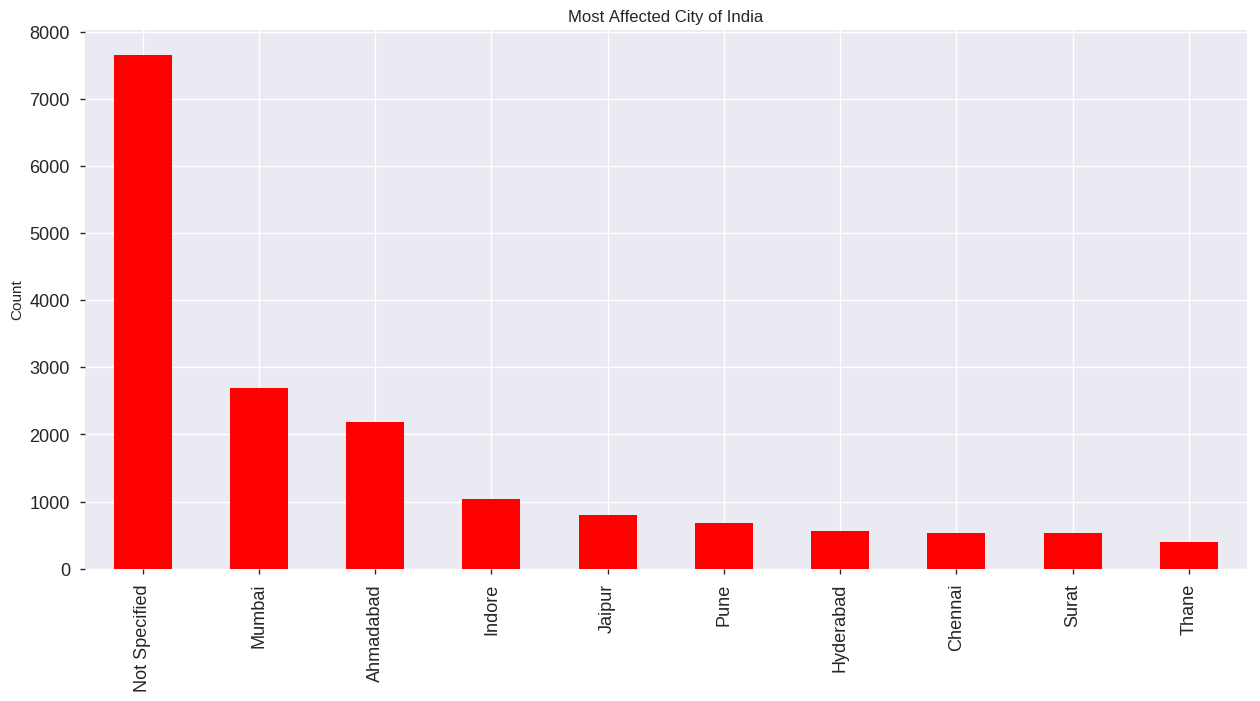

In [104]:
# Top 10 most affected city of India.
df_raw['Detected District'].value_counts()[:10].plot(kind='bar', figsize=(15,7), fontsize=13, color='red')
plt.ylabel('Count')
plt.title('Most Affected City of India')

- From this bar graph it is clear that **Mumbai** is the most affected City of India till date. There are many cases where the District or City are not specified. But we can still get the insight on the affected city.

<a id=section50104></a>
### 5.1.4 Total Cases Trend

In [105]:
df_raw.head()

,Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Nationality,Type of transmission,Backup Notes
0,1,30/01/2020,10-20,Female,Thrissur,Thrissur,Kerala,Recovered,India,Imported,Student from Wuhan
1,2,2/2/2020,70-80,Not Specified,Alappuzha,Alappuzha,Kerala,Recovered,India,Imported,Student from Wuhan
2,3,3/2/2020,10-20,Not Specified,Kasaragod,Kasaragod,Kerala,Recovered,India,Imported,Student from Wuhan
3,4,2/3/2020,40-50,Male,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,India,Imported,Travel history to Italy and Austria
4,5,2/3/2020,20-30,Male,Hyderabad,Hyderabad,Telangana,Recovered,India,Imported,"Travel history to Dubai, Singapore contact"


Text(0,0.5,'Count')

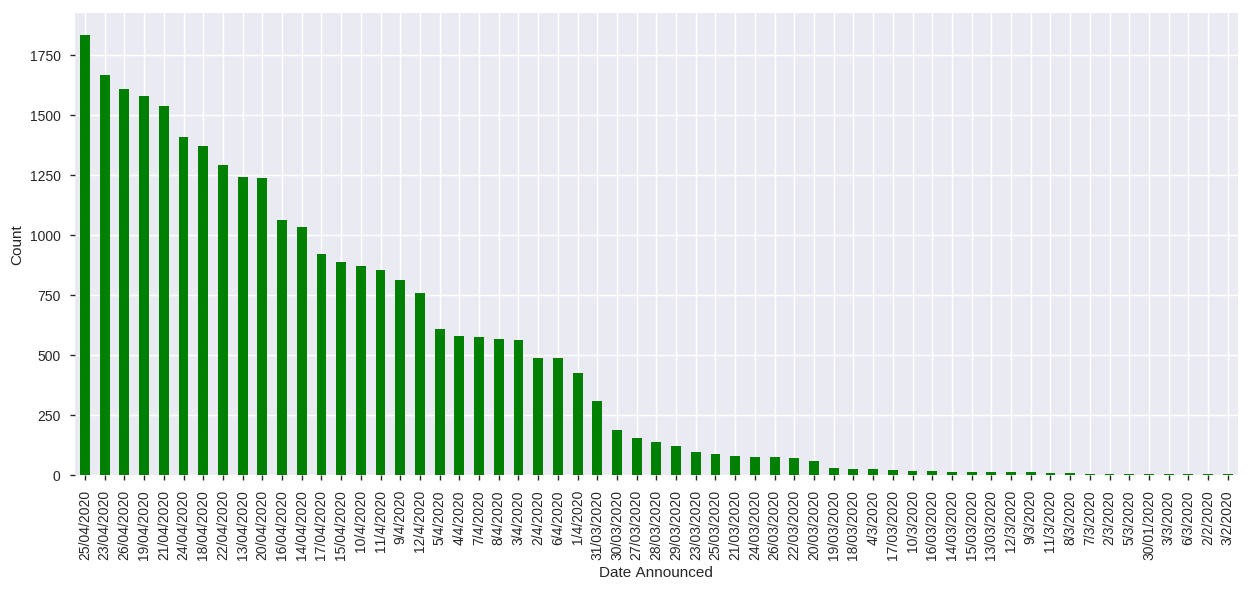

In [107]:
plt.figure(figsize = (15, 6))
df_raw.groupby('Date Announced')['Current Status'].count().sort_values(ascending=False).plot(kind='bar', color='green')
plt.ylabel('Count')

- From this graph it is quite evident that the cases are increasing rapidly in **India** on daily basis.

<a id=section502></a>
## 5.2 Analysis Based on Age Groups

Text(0.5,1,'Total Cases Based on Age Group')

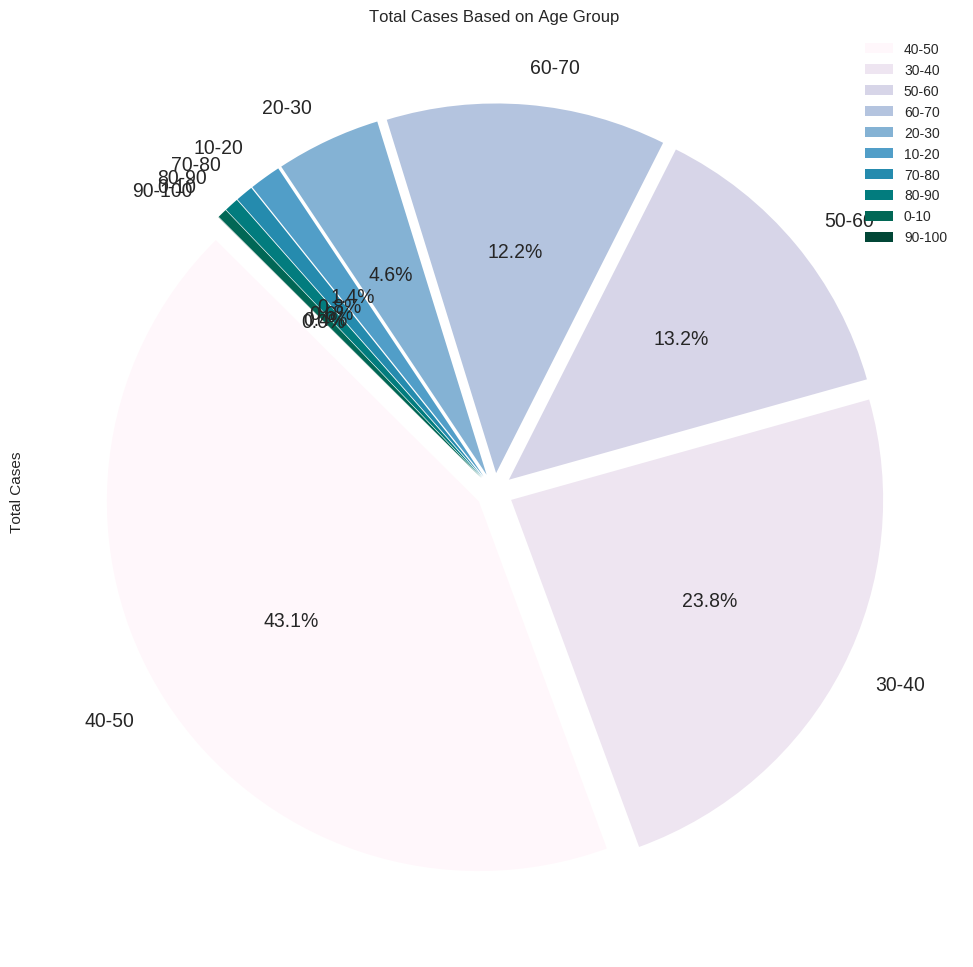

In [113]:
df_raw['Age Bracket'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(12,12), shadow=False, startangle=135, legend=True, cmap='PuBuGn')

plt.ylabel('Total Cases')
plt.title('Total Cases Based on Age Group')

- From the **Pie Chart** it is clear that **40-50** Age group is highly affected by **COVID-19 Pandemic in India** followed by **30-40** and ***50-60**.
- The list affected Age Group are **0-10** and **90-100** probably may be due to extra precautions(**0-10** Age group) and less number of People (for **90-100** Age Group).

<a id=section503></a>
## 5.3 Analysis Based on Gender

Text(0.5,1,'Total Cases Based on Gender')

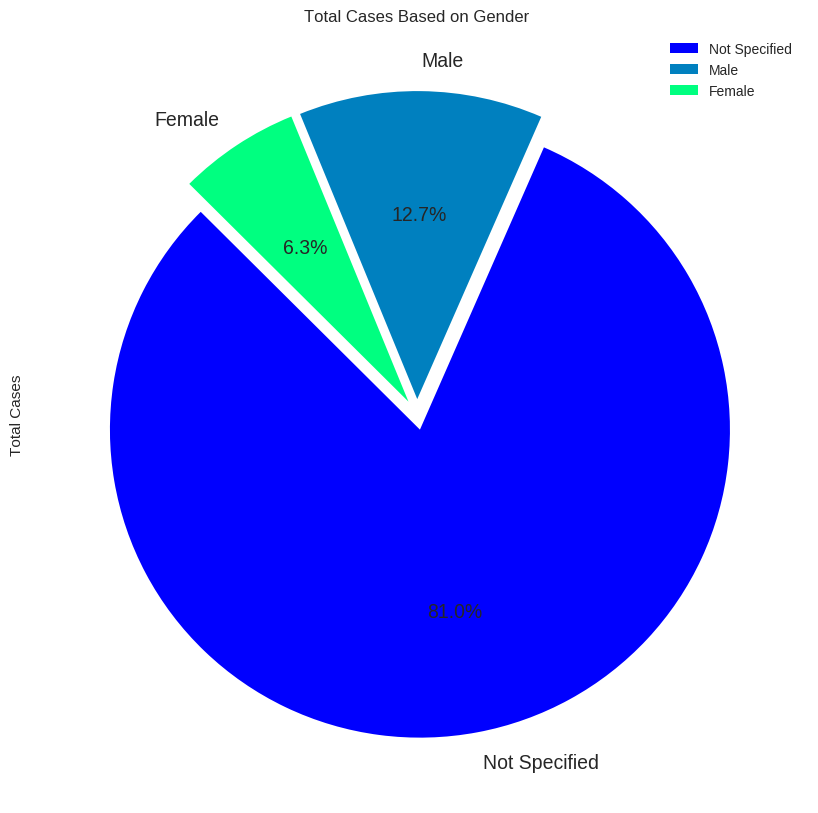

In [114]:
df_raw['Gender'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=False, startangle=135, legend=True, cmap='winter')

plt.ylabel('Total Cases')
plt.title('Total Cases Based on Gender')

- There are about **81%** of data where **Gender** is not specified but if we ignore that then we can see the affected ration for **Male** is higher than **Female**.

<a id=section504></a>
## 5.4 Total Positive Case Distribution by States

Text(0.5,1,'Positive COVID-19 Case Distribution Sate wise In India')

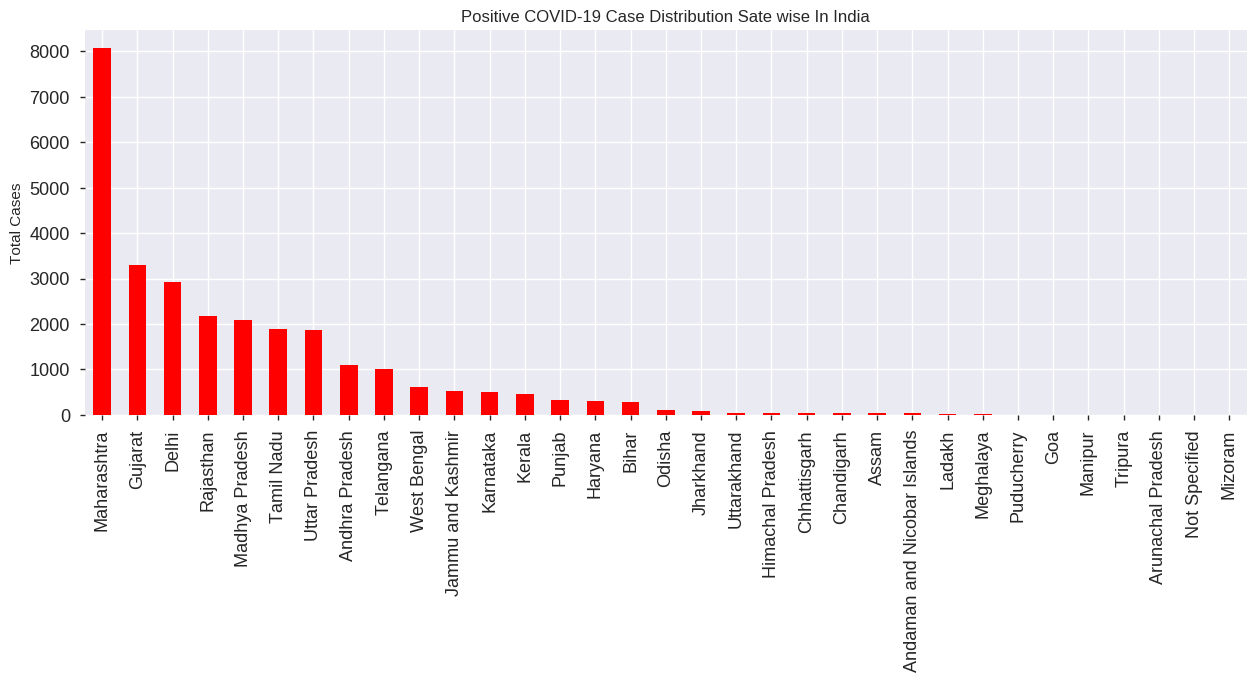

In [152]:
df_raw['Detected State'].value_counts().plot(kind='bar', figsize=(15,5), fontsize=13, color='red')

plt.ylabel('Total Cases')
plt.title('Positive COVID-19 Case Distribution Sate wise In India')


<a id=section505></a>
## 5.5 Active Cases Distribution by States

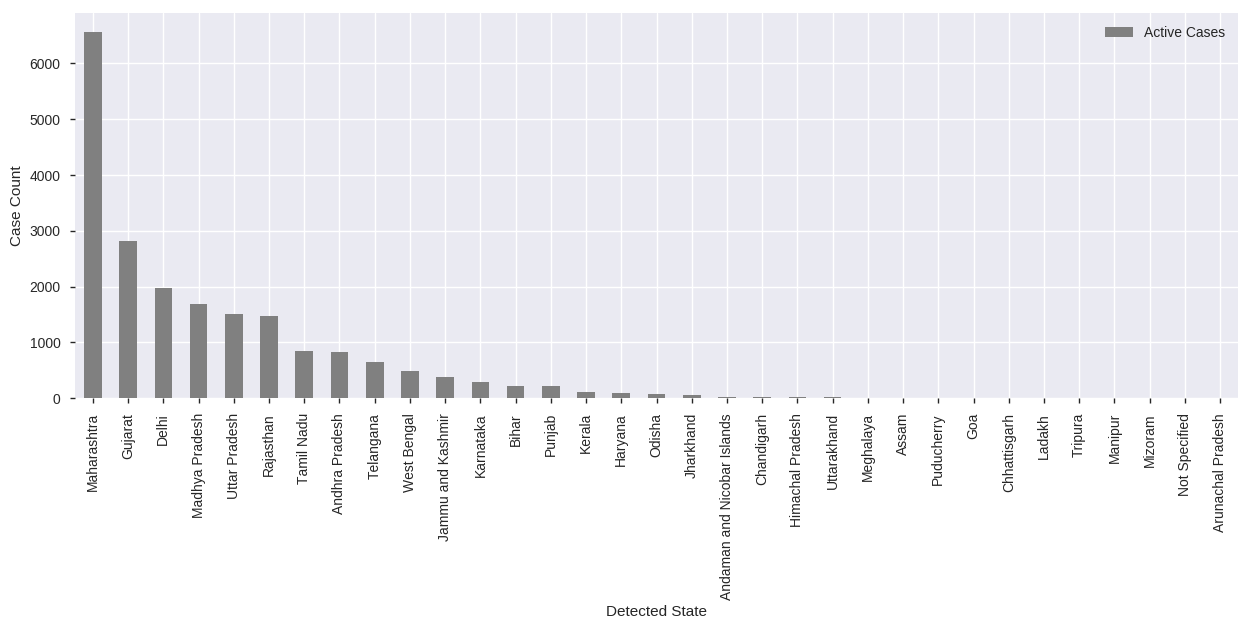

In [145]:

plt.figure(figsize=(15,5))
df_raw[df_raw['Current Status'] == 'Hospitalized'].groupby(['Detected State'])['Detected State'].count().sort_values(ascending=False).plot(kind='bar', color='grey', )

plt.ylabel('Case Count')
plt.legend(['Active Cases'])

- The above Bar chart shows the total **Active Cases** by States.
- **Maharashtra** State is having the highest number of Active cases and **Arunachal Pradesh** Sate is having least number of Active Cases.

<a id=section506></a>
## 5.6 Recovered Case Distribution by States

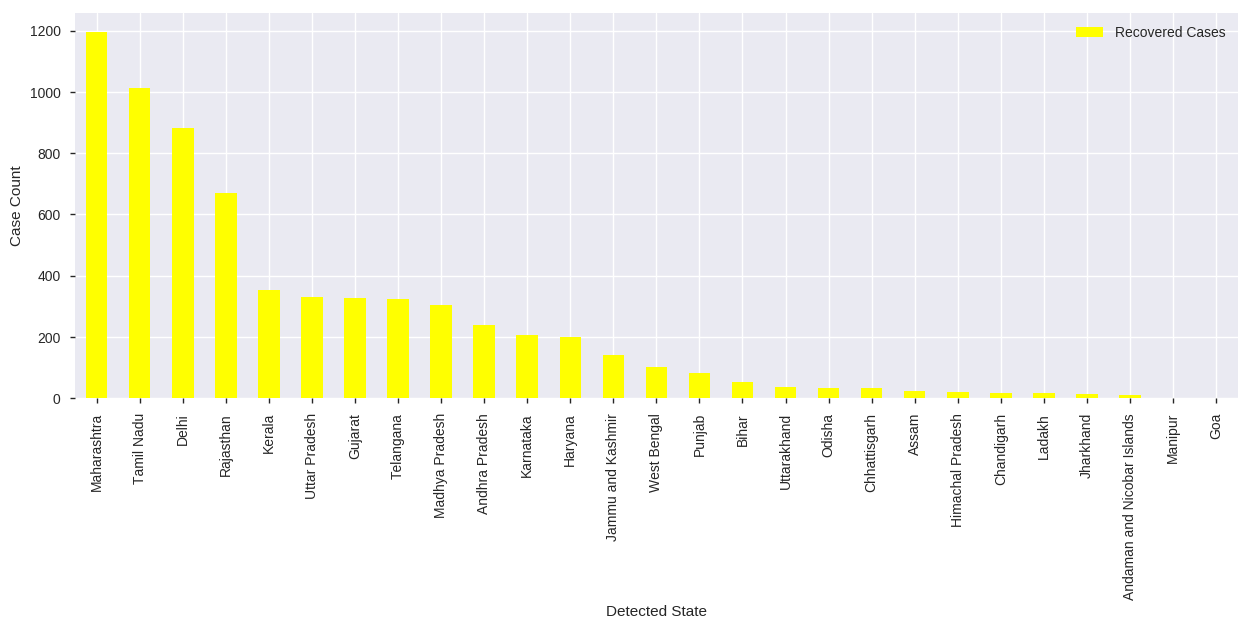

In [147]:

plt.figure(figsize=(15,5))
df_raw[df_raw['Current Status'] == 'Recovered'].groupby(['Detected State'])['Detected State'].count().sort_values(ascending=False).plot(kind='bar', color='yellow', )

plt.ylabel('Case Count')
plt.legend(['Recovered Cases'])

- The above Bar chart shows the total **Recovered Cases** by States.
- **Maharashtra** State is having the highest number of **Recovered Cases** and this is quite obvious as the total number of cases are also highest in the State.
- Here we can notice that States like **Tamilnadu** and **Kerala** who stood at 6th and 13th rank respectively for **Total Positive Cases Detected** is now occupied the 2nd and 5th rank respectively for **Total Patients Recovered** which is a great achievement. And this gives us the information about how the health care system are doing in each State so that the Government can take necessary steps to improve the same by spreading awarness among people and providing necessary equipments to Hospitals to improve the recovery rate.

<a id=section507></a>
## 5.7 Deceased Case Distribution by States

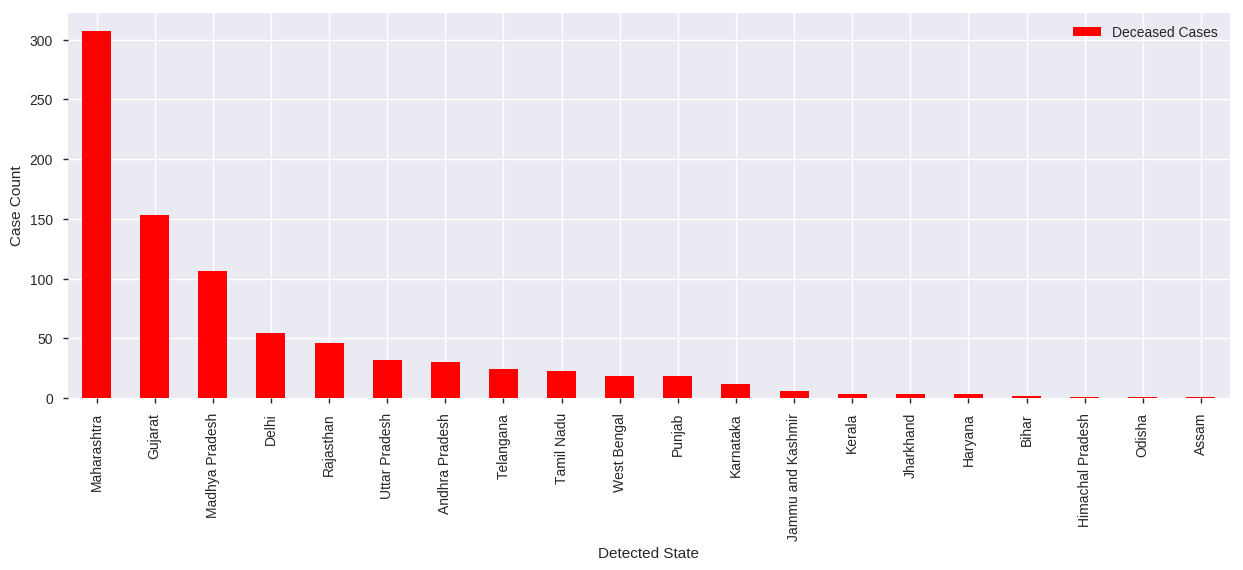

In [154]:

plt.figure(figsize=(15,5))
df_raw[df_raw['Current Status'] == 'Deceased'].groupby(['Detected State'])['Detected State'].count().sort_values(ascending=False).plot(kind='bar', color='red', )

plt.ylabel('Case Count')
plt.legend(['Deceased Cases'])

- Again as **3%** of the total patients are died so here we are showing the **State** wise death rate due to **COVID-19**.
- **Maharashtra** tops the list followed by **Gujarat** and **MP**.
- **Himachal Pradesh**, **Odisha** and **Assam** States are having lowest death rate.

<a id=section6></a>
## 6. Conclusion

- It is analysed that **COVID-19** cases are increasing very rapidly in **India**.

- The recovery is also in good progress. How ever the **Percentage of Recovery** will only improve when the **Number of Positive Cases** will decrease and to do the same everyone should understand the effect of this deadly **COVID-19 virus** and take necessary precautions.

- The **Health care team** are doing a fabulous job and also the best decision **Lock Down** by the **Indian Government** has really helping to **Stop the Spread**.

- However, everything is in the hand of people so **#StayHomeStaySafe**. 

<a id=section601></a>
### 6.1 Actionable Insights

- From the above analysis it is clear that mostly **Adults and people age group of 50-80 are more prone to this Virus attack**. So these age groups should take extra precautions.
- All the **Hospital Staffs** who are helping the patients to recover must be supplied with necessary equipments. Government should take necessary steps to arrange those.
- Strict Police action should be taken against the people who are violating the lockdown rules.
- Child and elderly people should be taken care properly to boost their immunity.